In [1]:
!gdown 147FUijJc2yuu5S5CEDOx46vElUDGhAhE

Downloading...
From: https://drive.google.com/uc?id=147FUijJc2yuu5S5CEDOx46vElUDGhAhE
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 15.1MB/s]


In [2]:
import pandas as pd

df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
import numpy as np
N = df.shape[0]
X = df.drop('Sales', axis=1)
y = df['Sales'].values

def mean_normalization(X):
  max_val = np.max(X)
  min_val = np.min(X)
  avg = np.mean(X)
  temp = (X - avg) / (max_val - min_val)
  X_b  = np.c_[np.ones(N), temp]
  return X_b

X = mean_normalization(X)
print(X.shape)

(200, 4)


In [4]:
thetas =  np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
print(thetas.shape)
print(X[0].shape)

(4, 1)
(4,)


In [5]:
thetas.T.dot(X[0]).shape, y[0].T.shape

((1,), ())

In [6]:
X[0:5].dot(thetas), y[0:5].T

(array([[0.57662043],
        [1.07270062],
        [1.2035544 ],
        [0.79969324],
        [0.57502387]]),
 array([22.1, 10.4, 12. , 16.5, 17.9]))

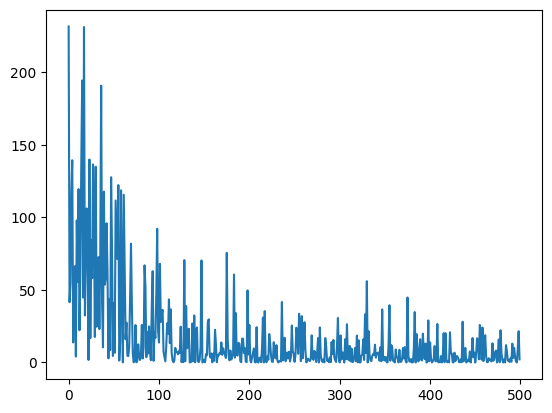

In [7]:
def stochastic_gradient_descent(X, y, n_epochs=50, learning_rate=0.00001):
  thetas =  np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
  thetas_path = [thetas]
  N = X.shape[0]

  losses = []
  for epoch in range(n_epochs):
    for i in range(N):
      random_index = i
      x = X[random_index : random_index + 1]
      y_true = y[random_index : random_index + 1]
      y_pred = x.dot(thetas)

      loss = 0.5 * (y_pred - y_true) ** 2
      losses.append(loss[0])
      thetas = thetas - learning_rate * (y_pred - y_true) * x.T
      thetas_path.append(thetas)

  return thetas_path, losses

sgd_thetas, losses = stochastic_gradient_descent(X, y, learning_rate=0.01)
x_axis = list(range(500))
import matplotlib.pyplot as plt

plt.plot(x_axis, losses[:500])
plt.show()

In [8]:
sgd_thetas, losses = stochastic_gradient_descent(X, y, n_epochs = 1, learning_rate=0.01)
np.sum(losses)

6754.643359356192

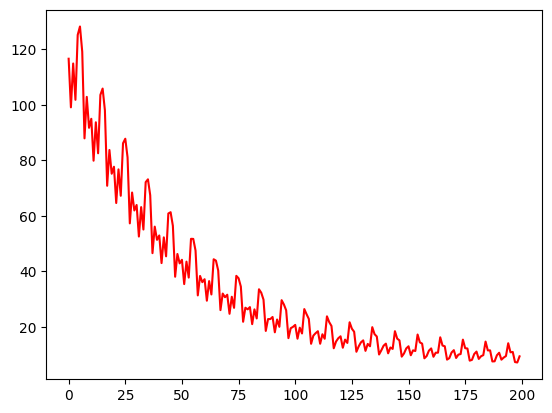

In [9]:
def mini_batch_gradient_descent(X, y, n_epochs=50, minibatch_size=20, learning_rate = 0.01):
  thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
  thetas_path = [thetas]
  losses = []
  for epoch in range(n_epochs):
     # shuffled_indices = np.random.permutation(N)

     shuffled_indices = np.asarray([21, 144, 17, 107, 37, 115, 167, 31, 3,
      132, 179, 155, 36, 191, 182, 170, 27, 35, 162, 25, 28, 73, 172, 152, 102, 16,
      185, 11, 1, 34, 177, 29, 96, 22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126,
      165, 78, 151, 104, 110, 53, 181, 113, 173, 75, 23, 161, 85, 94, 18, 148, 190,
      169, 149, 79, 138, 20, 108, 137, 93, 192, 198, 153, 4, 45, 164, 26, 8, 131,
      77, 80, 130, 127, 125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9, 84, 188, 139,
      195, 72, 64, 194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 41, 147,
      92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38, 47,
      174, 100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67,
      129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95, 0, 40, 83, 24,
      168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55,
      133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 122,
      154])

     X_b_shuffled = X[shuffled_indices]
     y_shuffled = y[shuffled_indices]
     for i in range(0, N, minibatch_size):
        x = X_b_shuffled[i: i + minibatch_size]
        y_true = y_shuffled[i: i + minibatch_size]

        y_pred = x.dot(thetas)
        loss = 0.5 * (y_pred.T - y_true) **2
        loss_mean = np.sum(loss) / minibatch_size
        losses.append(loss_mean)

        grad = x.T.dot((y_pred.T - y_true).T)
        thetas = thetas - learning_rate * grad / minibatch_size
        thetas_path.append(thetas)
  return thetas_path, losses

mbgd_thetas, losses = mini_batch_gradient_descent(X, y, n_epochs=50, minibatch_size = 20, learning_rate=0.01)
x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color="r")
plt.show()

In [10]:
mbgd_thetas, losses = mini_batch_gradient_descent(X, y, n_epochs=50, minibatch_size = 20, learning_rate=0.01)
print(round(sum(losses),2))

8865.65


In [11]:
X.shape, thetas.shape

((200, 4), (4, 1))

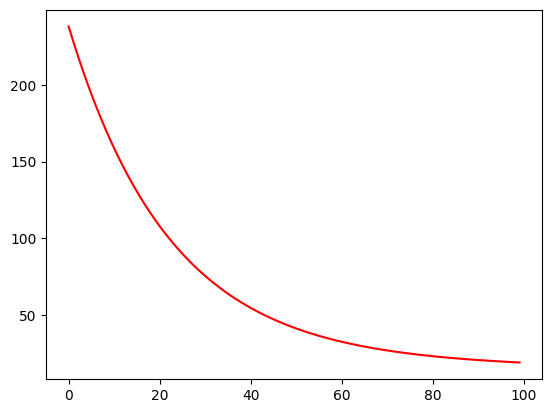

In [12]:
def batch_gradient_descent(X, y, n_epochs=50, learning_rate=0.00001):
  thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])
  N = X.shape[0]

  thetas_path = [thetas]
  losses = []
  for epoch in range(n_epochs):
    y_pred = X.dot(thetas)
    loss = (y_pred.T - y) ** 2
    mean_loss = np.sum(loss) / N
    losses.append(mean_loss)

    grad = 2 * X.T.dot((y_pred.T - y).T)
    thetas = thetas - learning_rate * grad / N
    thetas_path.append(thetas)


  return thetas_path, losses


bgd_thetas, losses = batch_gradient_descent(X, y, n_epochs=100, learning_rate=0.01)
x_axis = list(range(100))
plt.plot(x_axis,losses[:100], color="r")
plt.show()

In [13]:
bgd_thetas, losses = batch_gradient_descent(X, y, n_epochs=100, learning_rate=0.01)
print(round(sum(losses),2))

6716.46


In [14]:
!gdown 1J-5CIhfaQpSY_HuICuQJa6OvHzTQXj4Q

Downloading...
From: https://drive.google.com/uc?id=1J-5CIhfaQpSY_HuICuQJa6OvHzTQXj4Q
To: /content/BTC-Daily.csv
100% 257k/257k [00:00<00:00, 35.9MB/s]


In [15]:
df = pd.read_csv('BTC-Daily.csv')
df = df.drop_duplicates()
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [16]:
df['date'] = pd.to_datetime(df['date'])
date_range = str(df['date'].dt.date.min()) + ' to ' + str(df['date'].dt.date.max())
print(date_range)
df.head()


2014-11-28 to 2022-03-01


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


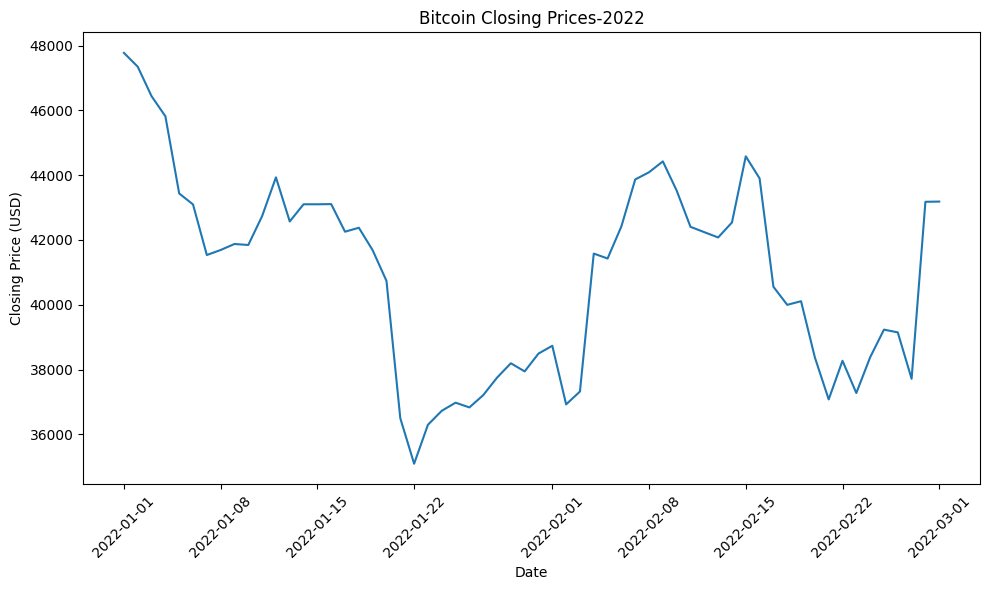

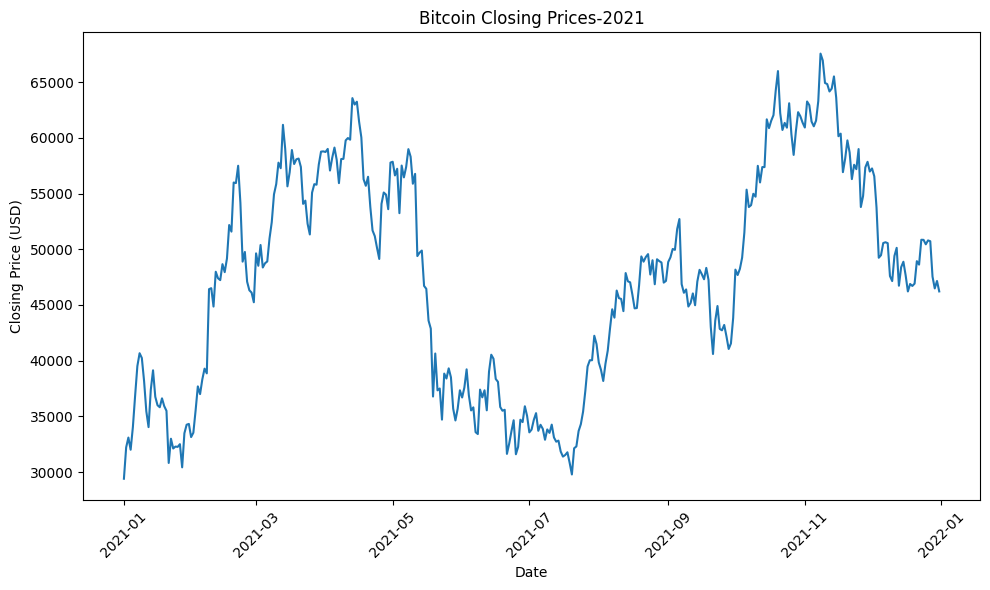

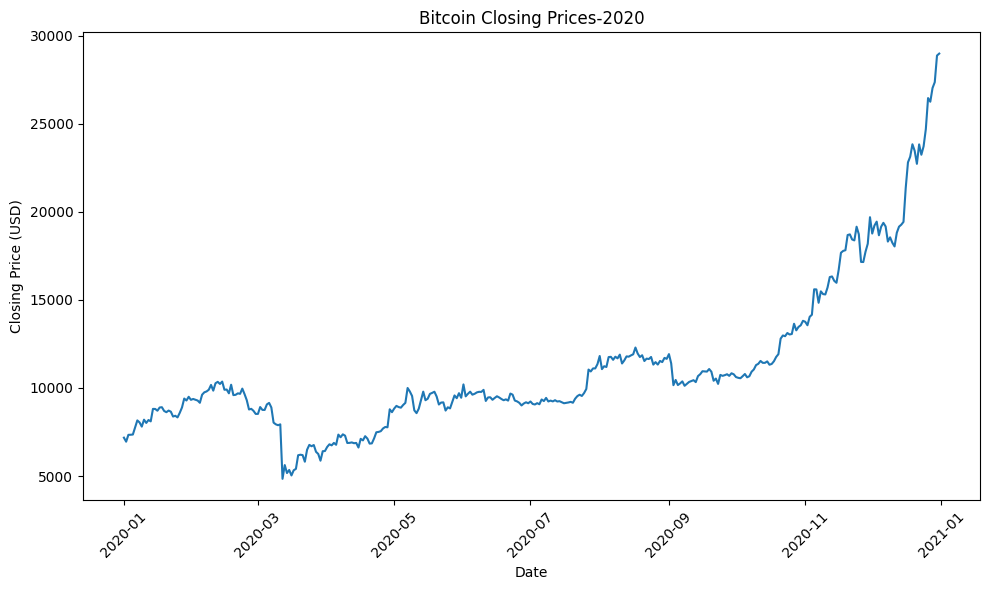

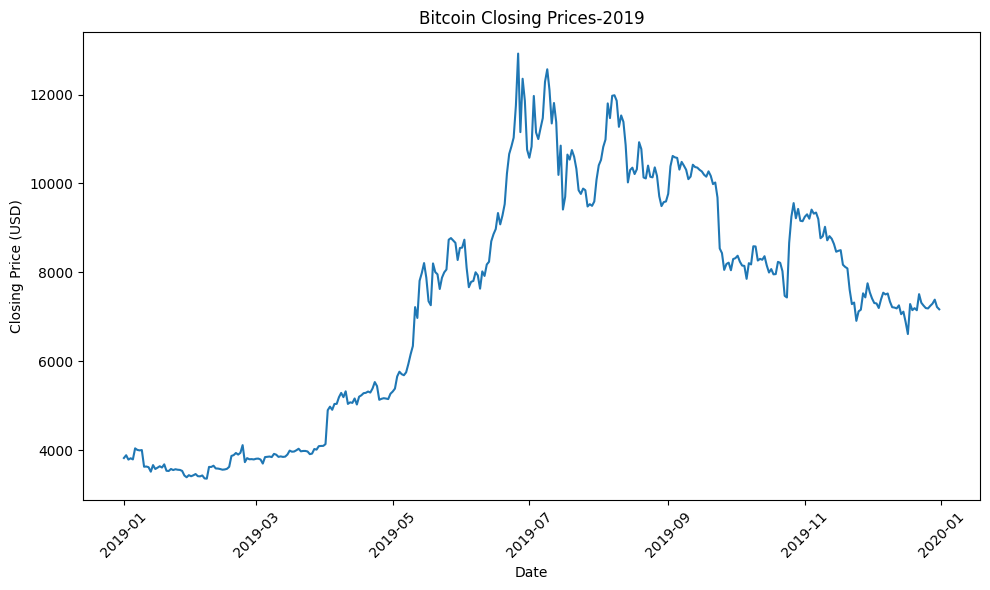

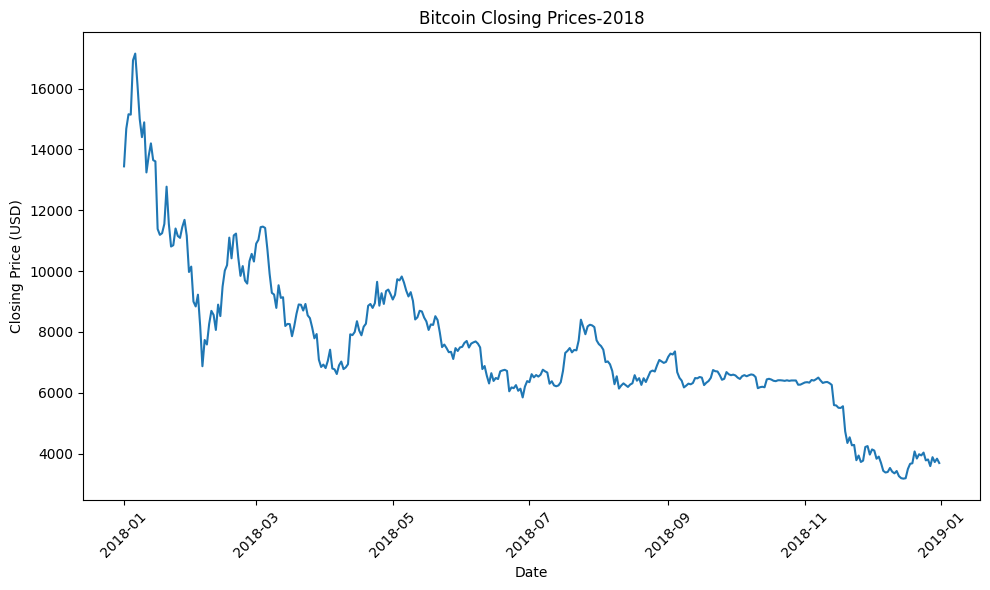

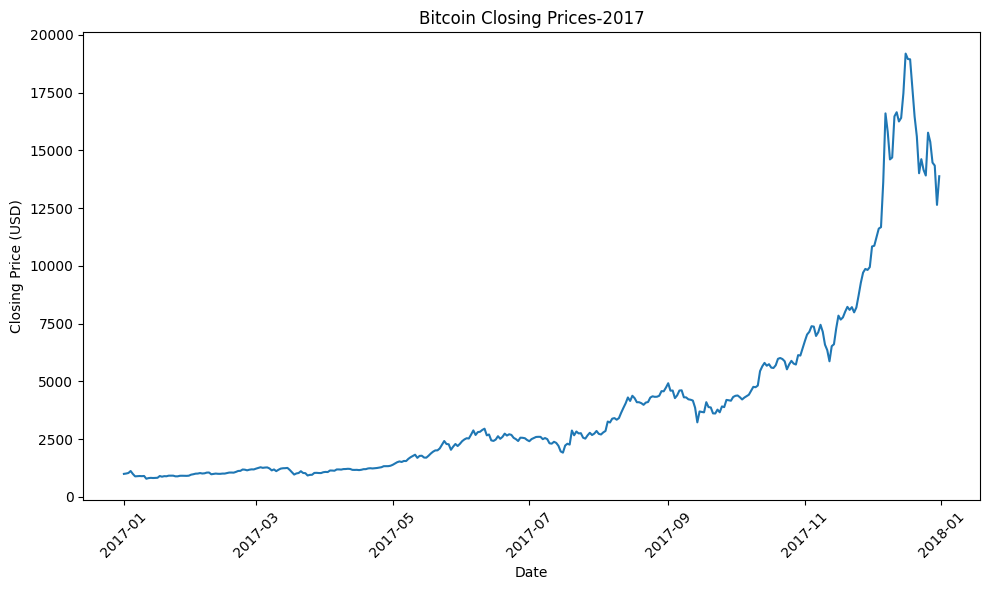

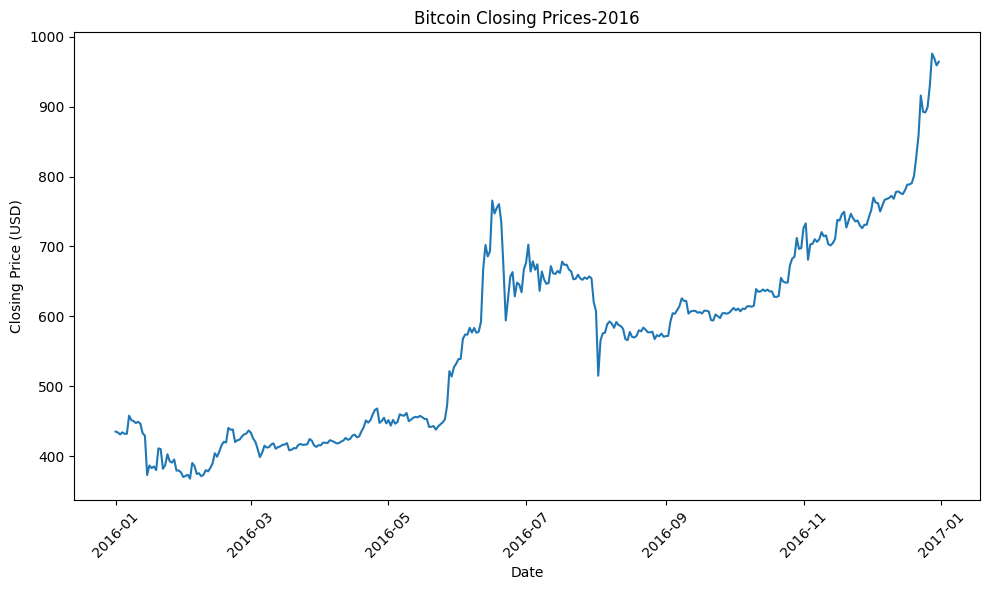

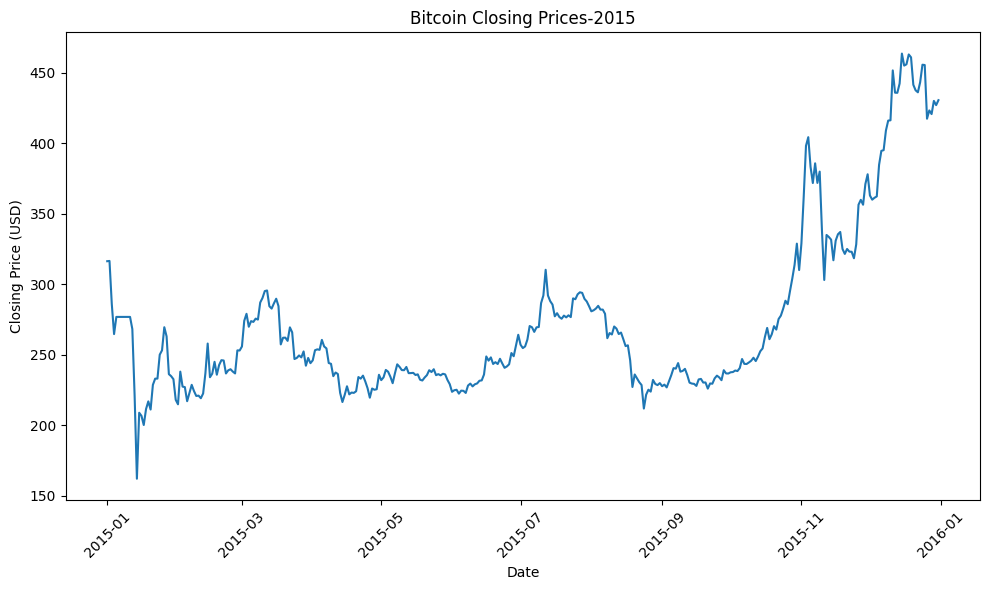

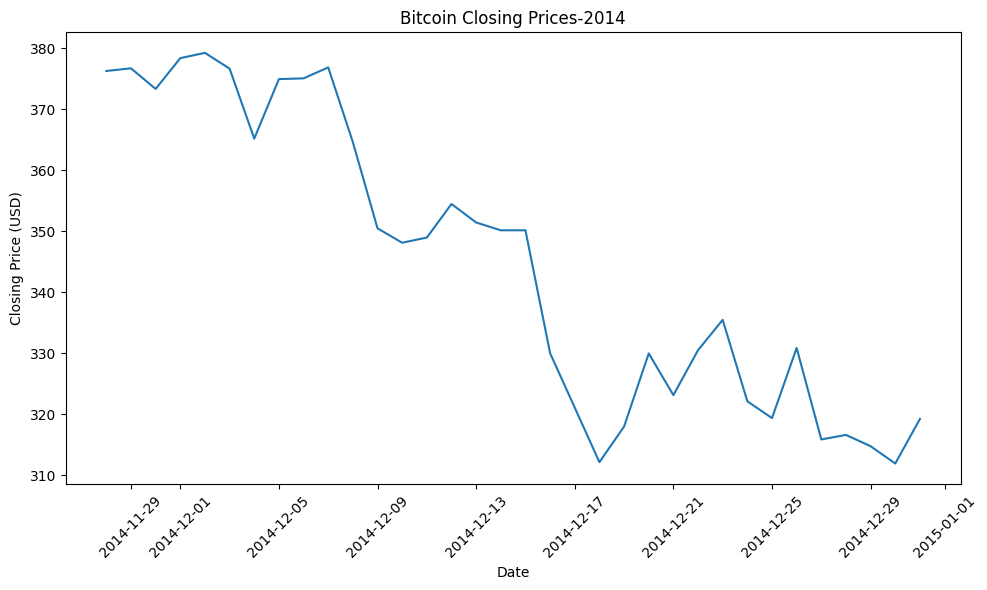

In [23]:

# Generate unique years
unique_years = df['date'].dt.year.unique()
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


for year in unique_years:
    # Create year_month_day from date
    year_month_day = df[df.year == year][['year', 'month', 'day']]
    # Merge data
    merged_data = pd.merge(year_month_day, df, on=['year', 'month', 'day'], how='left')

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['date'], merged_data['close'])
    plt.title(f'Bitcoin Closing Prices-{year}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [24]:
%pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 6.6 MB/s eta 0:00:00


<ipython-input-25-0cb66404e85c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


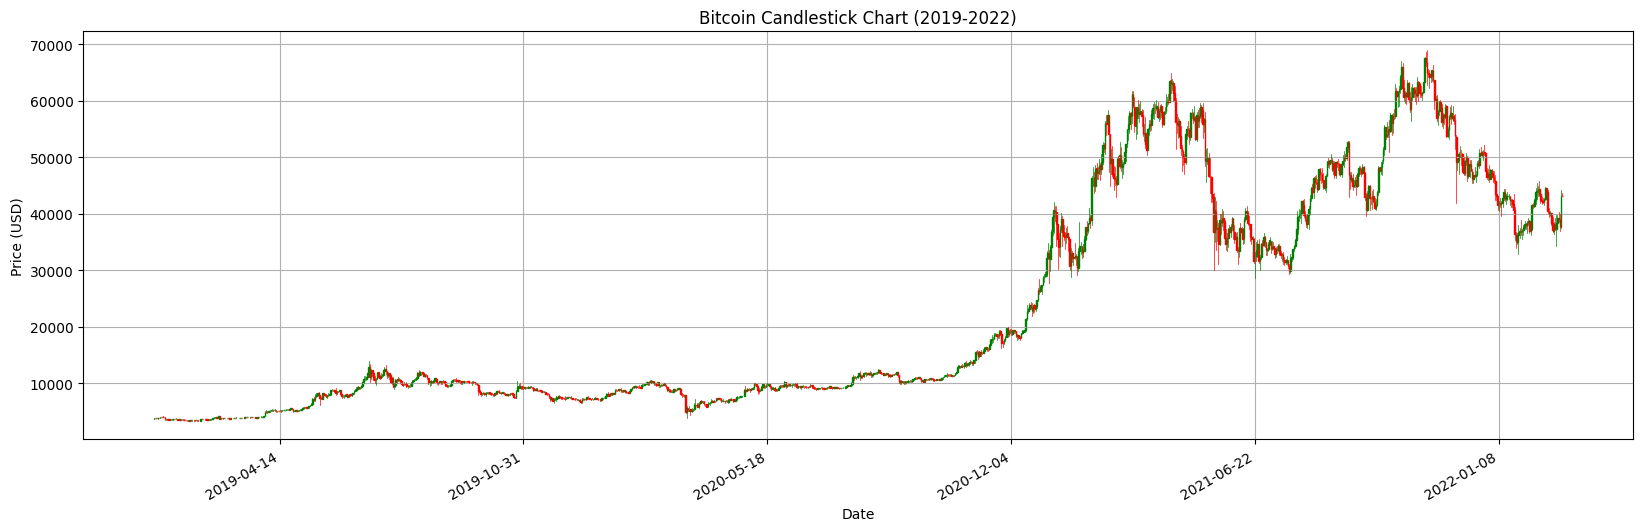

In [25]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime

# Filter data for 2019-2022
df_filtered = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2022-12-31')]

# Convert date to matplotlib format
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

# Create the candlestick chart
fig, ax = plt.subplots(figsize=(20, 6))

candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values,
                 width=0.6, colorup='g', colordown='r')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.title('Bitcoin Candlestick Chart (2019-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

# Save the plot as a PDF
plt.savefig('bitcoin_candlestick_2019_2022.pdf')

plt.show()


In [26]:
def predict(X, w, b):
  return X.dot(w) + b

def gradient(y_hat, y, x):
  loss = y_hat - y
  dw = x.T.dot(loss) / len(y)
  db = np.sum(loss) / len(y)
  cost = np.sum(loss ** 2) / (2 * len(y))
  return dw, db, cost

def update_weight(w, b, lr, dw, db):
  w_new = w - lr * dw
  b_new = b - lr * db
  return w_new, b_new

In [72]:
temp = df['date'].dt.strftime('%Y%m%d%H%M%S')
df['numerical_date'] = pd.to_numeric(temp)

In [80]:
X = df[['open', 'high', 'low']].values
y = df['close'].values

In [81]:
X.shape, y.shape

((2651, 3), (2651,))

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1)).reshape(-1)

In [83]:
def linear_regression_vectorized(X, y, learning_rate=0.01, num_iterations=200):
  n_samples, n_features = X.shape

  w = np.zeros(n_features)
  losses = []
  b = 0

  for i in range(num_iterations):
    y_hat = predict(X, w, b)
    dw, db, cost = gradient(y_hat, y, X)
    w, b = update_weight(w, b, learning_rate, dw, db)
    losses.append(cost)

  return w, b, losses


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

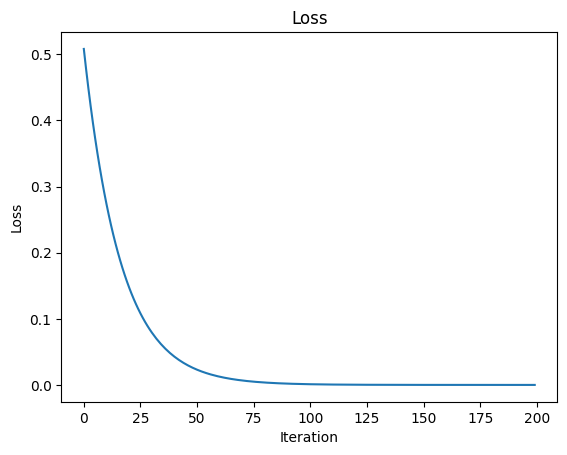

In [85]:
w, b, losses = linear_regression_vectorized(X_train, y_train,
                                           learning_rate=0.01, num_iterations=200)

# Plot the loss
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss')
plt.show()

In [86]:
from sklearn.metrics import r2_score
import numpy as np

# Make predictions on the test set
y_pred = predict(X_test, w, b)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

# Calculate MAE
mae = np.mean(np.abs(y_pred - y_test))

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate R-squared on training data
y_train_pred = predict(X_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)

# Calculate R-squared on testing data
test_accuracy = r2_score(y_test, y_pred)

print("Root Mean Square Error (RMSE):", round(rmse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Training Accuracy (R-squared):", round(train_accuracy, 4))
print("Testing Accuracy (R-squared):", round(test_accuracy, 4))

Root Mean Square Error (RMSE): 0.0293
Mean Absolute Error (MAE): 0.0138
Training Accuracy (R-squared): 0.9989
Testing Accuracy (R-squared): 0.9991


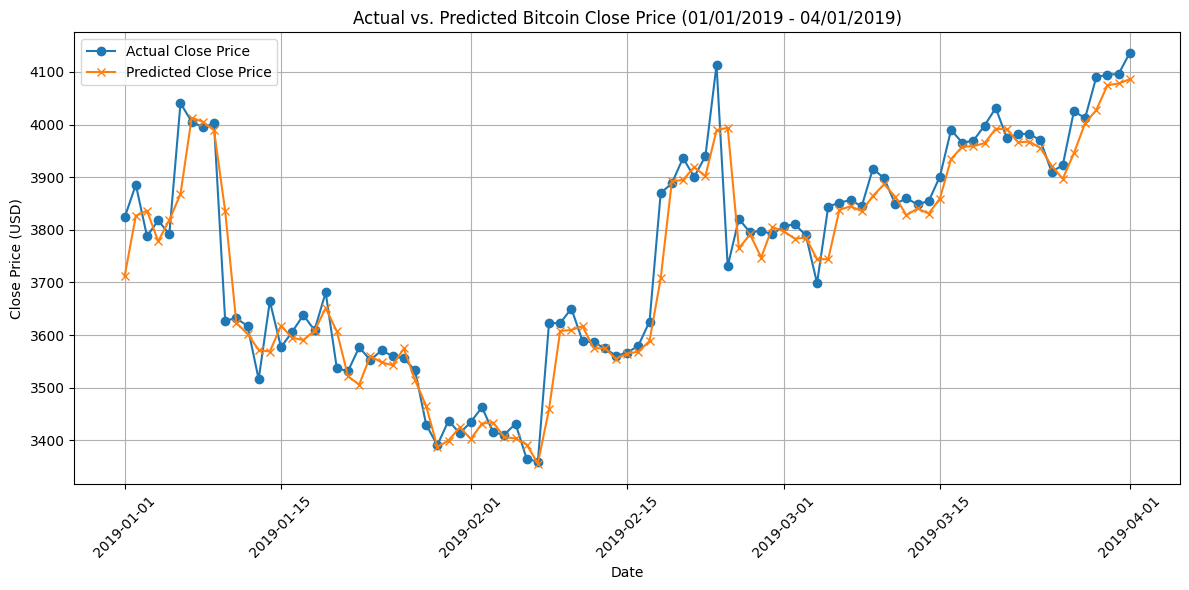

In [87]:
df_2019_q1 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-04-01')]

# Prepare X and y for prediction
X_2019_q1 = df_2019_q1[["open", "high", "low"]]
y_2019_q1_actual = df_2019_q1["close"]

y_2019_q1_pred = predict(X_2019_q1, w, b)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df_2019_q1['date'], y_2019_q1_actual, label='Actual Close Price', marker='o')
plt.plot(df_2019_q1['date'], y_2019_q1_pred, label='Predicted Close Price', marker='x')
plt.title('Actual vs. Predicted Bitcoin Close Price (01/01/2019 - 04/01/2019)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
